<a href="https://colab.research.google.com/github/cuzmyk/Detman/blob/main/2s_3pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [11]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten
from keras.utils import to_categorical

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [12]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


In [13]:
print(trainy.shape)
print(testy.shape)

(60000,)
(10000,)


## 1.3. Визуализируем часть данных из датасета

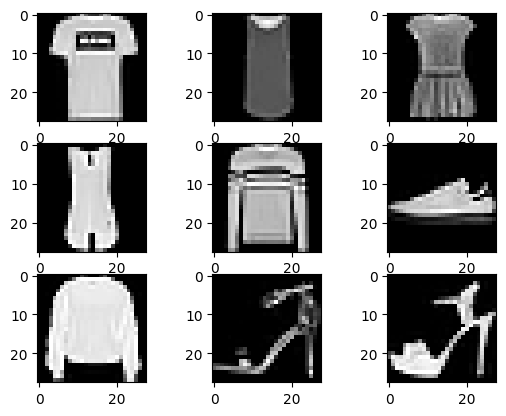

In [14]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [15]:
model = Sequential([
    Conv2D(6, (5,5), strides=(1,1), activation='tanh', input_shape=(28,28,1)),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(16, (5,5), strides=(1,1), activation='tanh'),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(units=120,activation='tanh'),
    Dense(units=84,activation='tanh'),
    Dense(units=10,activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [16]:
trainX = trainX / 255
testX = testX / 255

trainy = to_categorical(trainy, 10)
testy = to_categorical(testy, 10)

trainX = np.expand_dims(trainX, axis=3)
testX = np.expand_dims(testX, axis=3)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)
print(trainy.shape)
print(testy.shape)

Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [17]:
EPOCH = 3

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

m = model.fit(trainX, trainy, batch_size=32, epochs=EPOCH, validation_split=0.2)

model.evaluate(testX, testy)

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7146 - loss: 0.7813 - val_accuracy: 0.8321 - val_loss: 0.4553
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8405 - loss: 0.4399 - val_accuracy: 0.8568 - val_loss: 0.3915
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8626 - loss: 0.3727 - val_accuracy: 0.8677 - val_loss: 0.3621
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8619 - loss: 0.3791


[0.38169845938682556, 0.8600999712944031]

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

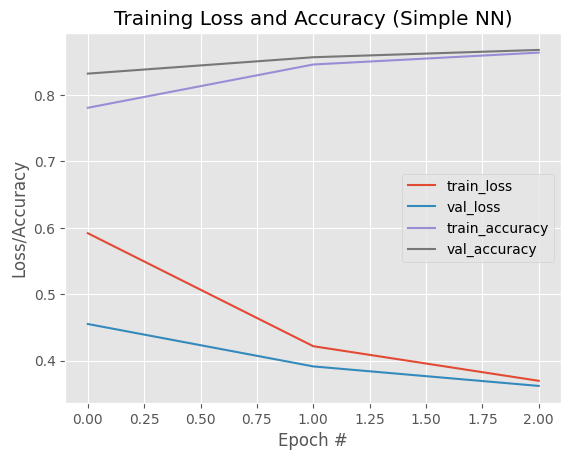

In [18]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, m.history["loss"], label="train_loss")
plt.plot(N, m.history["val_loss"], label="val_loss")
plt.plot(N, m.history["accuracy"], label="train_accuracy")
plt.plot(N, m.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [19]:
label = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
         "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files

count = 0

while count != 5:
  uploaded = files.upload()

# загружаем входное изображение, меняем его размер на необходимый и выводим его
  image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
  image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
  image = cv2.bitwise_not(image) # Инверсия цветов
  orig = image
  image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)

  cv2_imshow(orig)

  preds = model.predict(image)
  print(preds)

  i = preds.argmax(axis=1)[0]
  print(f"Found: {label[i]}\n")

  count += 1

# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [22]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten

from keras.utils import to_categorical

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [23]:
! pip install wldhx.yadisk-direct
! curl -L $(yadisk-direct https://disk.yandex.ru/d/WA8k7NGVrqm7hQ) -o arch.zip
! unzip -qq arch.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 95.5M  100 95.5M    0     0  11.2M      0  0:00:08  0:00:08 --:--:-- 20.5M
replace Vegetable Images/test/Carrot/1001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Vegetable Images/test/Carrot/1002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [24]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/Vegetable Images/train")))

random.shuffle(imagePaths)

[INFO] loading images...


In [25]:
# формируем выборку
for imagePath in imagePaths:

	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)) # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон)

	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [26]:
data = np.array(data, dtype="float") #/ 255.0
labels = np.array(labels)

In [27]:
# формируем обучающую и валидационную выборки
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2250, 32, 32, 3)
(750, 32, 32, 3)
(2250, 3)
(750, 3)


In [28]:
# нормализация данных и преобраазование в массив numpy
trainX = trainX / 255
testX = testX / 255

# trainY = to_categorical(trainY, 3)
# testY = to_categorical(testY, 3)

#trainX = np.expand_dims(trainX, axis=-1)
#testX = np.expand_dims(testX, axis=-1)

labels = np.array(labels)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2250, 32, 32, 3)
(750, 32, 32, 3)
(2250, 3)
(750, 3)


In [29]:
# архитектура модели
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=2),
    # Conv2D(64, (3,3), padding='same', activation='relu'),
    # MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(12, activation='relu'),
    Dense(3,  activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │          98,316 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              39 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,251 (387.70 KB)

 Trainable params: 99,251 (387.70 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# параметры + компиляция
EPOCHS = 10

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [31]:
# добавляем коллбэки
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)   # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model_3_1.keras",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

In [32]:
# запускаем обучение
H = model.fit(trainX, trainY,
              validation_data=(testX, testY),
              epochs=EPOCHS,
              batch_size=100,
              callbacks=[early_stopping, checkpoint])

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.4168 - loss: 1.1399 - val_accuracy: 0.6413 - val_loss: 0.9898
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6256 - loss: 0.9570 - val_accuracy: 0.6253 - val_loss: 0.8732
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6498 - loss: 0.8658 - val_accuracy: 0.6333 - val_loss: 0.8134
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6405 - loss: 0.8133 - val_accuracy: 0.6293 - val_loss: 0.7906
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6572 - loss: 0.7793 - val_accuracy: 0.6440 - val_loss: 0.7675
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6399 - loss: 0.7894 - val_accuracy: 0.6680 - val_loss: 0.7511
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6518 - loss: 0.7667 - val_accuracy: 0.6973 - val_loss: 0.7195
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7005 - loss: 0.7396 - val_accuracy: 0.7027 - val_loss

In [33]:
# загрузка лучшей модели
from keras.models import load_model

model = load_model("/content/best_model_3_1.keras")

In [34]:
# следующие шаги: оценка точности, проверка модели (визуаизация Gradio)
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
              precision    recall  f1-score   support

      Carrot       0.59      0.98      0.74       238
    Cucumber       0.81      1.00      0.89       265
      Radish       0.97      0.12      0.22       247

    accuracy                           0.70       750
   macro avg       0.79      0.70      0.62       750
weighted avg       0.79      0.70      0.62       750



24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


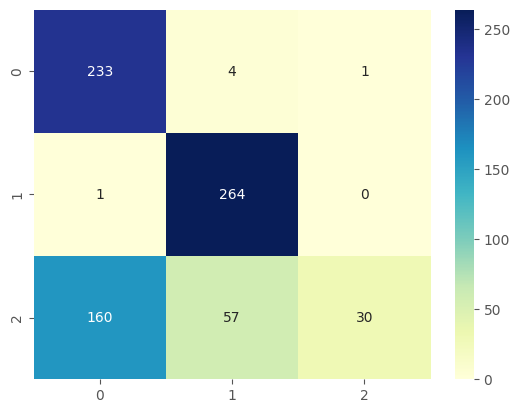

In [35]:
# матрица ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(testX, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = testY.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

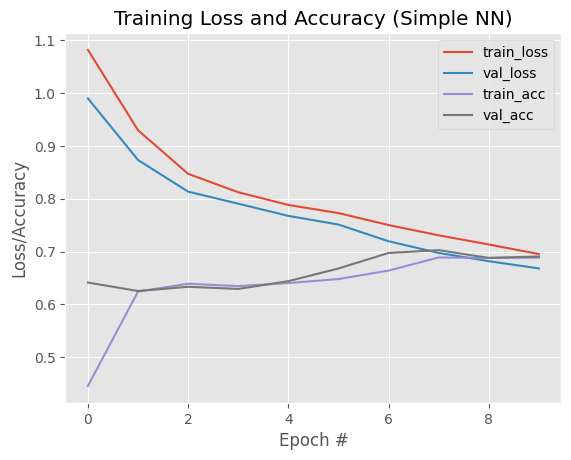

In [36]:
# строим графики потерь и точности
EPOCHS = 10

N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

In [37]:
def save_model_and_labels(model, lb, model_path = "model_3_1.h5", labels_path = "label_bin_3_1"):

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

model_path = "model_3_1.h5"
labels_path = "label_bin_3_1"

save_model_and_labels(model, lb, model_path, labels_path)

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00


In [ ]:
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2
import numpy as np

In [ ]:
# Функция для предобработки изображения
def preprocess_image(img, compression_size = 32):

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    image = image[:, :, ::-1]                 # поменять каналы местами (RGB на BGR)
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с моделью
    image = image.reshape(-1, 32, 32, 3)

    return image

In [ ]:
# Функция прогноза по модели
def predict_image(img, preprocess_func = preprocess_image, model_path = "/content/model_3_1.h5", label_path = "/content/label_bin_3_1"):

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

In [ ]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/Vegetable Images/train/Carrot/0001.jpg",
              "/content/Vegetable Images/train/Cucumber/0001.jpg",
              "/content/Vegetable Images/train/Radish/0003.jpg"])

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://27b6fc3d61df6f54e5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


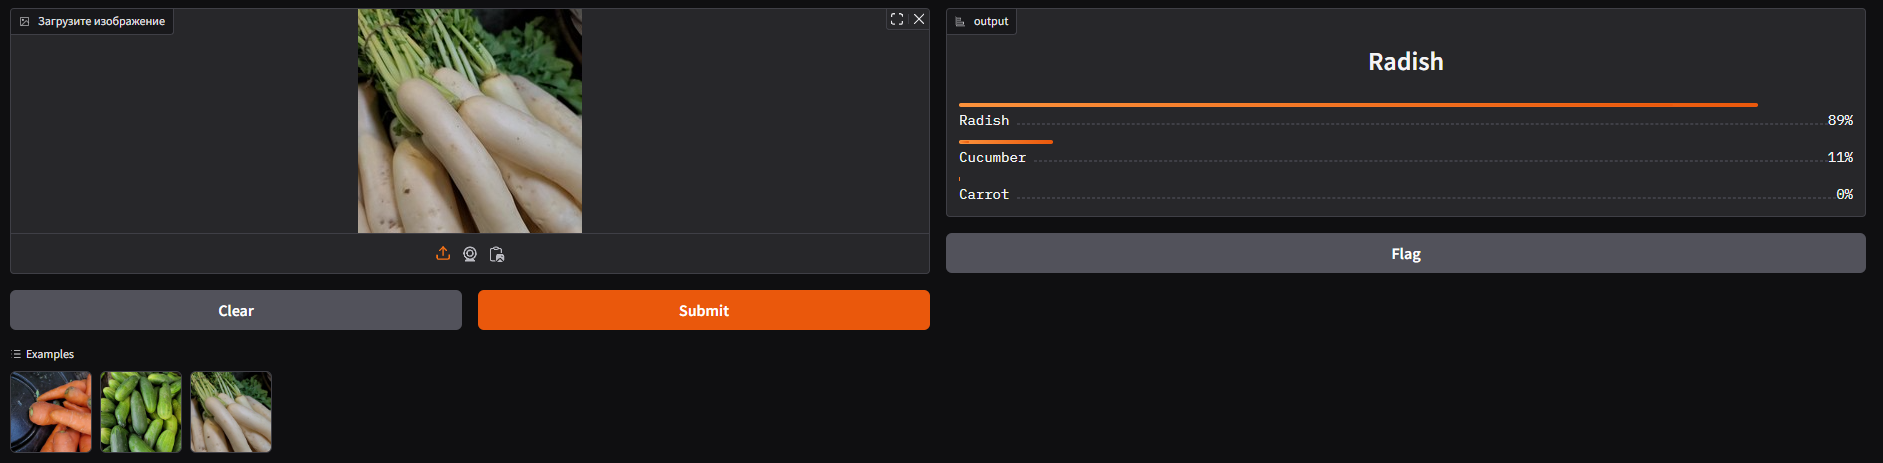

Хорошо определяет все овощи, но возможны ошибки, если  на фоне есть посторонние объекты цвета схожего с другим овощем

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

https://readmedium.com/how-cnn-architectures-evolved-c53d3819fef8

Архитектура VGGNet

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import os
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Упрощенные аугментации (для скорости)
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Загрузка данных с оптимальным batch_size для CPU
batch_size = 32  # Уменьшаем batch_size для CPU

train_dataset = datasets.ImageFolder(os.path.join("/content/Vegetable Images", "train"), transform=train_transform)
val_dataset = datasets.ImageFolder(os.path.join("/content/Vegetable Images", "validation"), transform=val_transform)
test_dataset = datasets.ImageFolder(os.path.join("/content/Vegetable Images", "test"), transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Используем предобученную VGG16 и заменяем классификатор (Transfer Learning)
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, 3)  # 3 класса (Carrot, Cucumber, Radish)
model = model.to(device)

# Оптимизатор Adam (быстрее, чем SGD)
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Меньше LR для стабильности
criterion = nn.CrossEntropyLoss()

# Обучение с прогресс-баром
def train_model(model, criterion, optimizer, epochs=5):
    best_acc = 0.0

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        model.train()
        train_loss, train_correct = 0.0, 0

        for inputs, labels in tqdm(train_loader, desc="Training"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            train_loss += loss.item() * inputs.size(0)
            train_correct += torch.sum(preds == labels.data)

        epoch_loss = train_loss / len(train_dataset)
        epoch_acc = train_correct.double() / len(train_dataset)
        print(f"Train Loss: {epoch_loss:.4f} | Acc: {epoch_acc:.4f}")

        # Валидация
        model.eval()
        val_loss, val_correct = 0.0, 0

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc="Validation"):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, preds = torch.max(outputs, 1)
                val_loss += loss.item() * inputs.size(0)
                val_correct += torch.sum(preds == labels.data)

        val_loss /= len(val_dataset)
        val_acc = val_correct.double() / len(val_dataset)
        print(f"Val Loss: {val_loss:.4f} | Acc: {val_acc:.4f}")

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_vgg16_cpu.pth")

    print(f"Best Val Acc: {best_acc:.4f}")

# Обучаем 5 эпох (достаточно для Transfer Learning)
train_model(model, criterion, optimizer, epochs=5)

# Тестирование
model.load_state_dict(torch.load("best_vgg16_cpu.pth"))
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Testing"):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Using device: cuda
Epoch 1/5


Training: 100%|██████████| 94/94 [00:45<00:00,  2.06it/s]


Train Loss: 0.0617 | Acc: 0.9777


Validation: 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]


Val Loss: 0.0002 | Acc: 1.0000
Epoch 2/5


Training: 100%|██████████| 94/94 [00:46<00:00,  2.04it/s]


Train Loss: 0.0008 | Acc: 0.9997


Validation: 100%|██████████| 19/19 [00:03<00:00,  5.31it/s]


Val Loss: 0.0000 | Acc: 1.0000
Epoch 3/5


Training: 100%|██████████| 94/94 [00:46<00:00,  2.04it/s]


Train Loss: 0.0000 | Acc: 1.0000


Validation: 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]


Val Loss: 0.0000 | Acc: 1.0000
Epoch 4/5


Training: 100%|██████████| 94/94 [00:47<00:00,  1.98it/s]


Train Loss: 0.0000 | Acc: 1.0000


Validation: 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]


Val Loss: 0.0000 | Acc: 1.0000
Epoch 5/5


Training: 100%|██████████| 94/94 [00:47<00:00,  2.00it/s]


Train Loss: 0.0000 | Acc: 1.0000


Validation: 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]


Val Loss: 0.0000 | Acc: 1.0000
Best Val Acc: 1.0000


Testing: 100%|██████████| 19/19 [00:03<00:00,  5.08it/s]

Test Accuracy: 99.83%



Classification Report:
              precision    recall  f1-score   support

      Carrot     0.9950    1.0000    0.9975       200
    Cucumber     1.0000    1.0000    1.0000       200
      Radish     1.0000    0.9950    0.9975       200

    accuracy                         0.9983       600
   macro avg     0.9983    0.9983    0.9983       600
weighted avg     0.9983    0.9983    0.9983       600



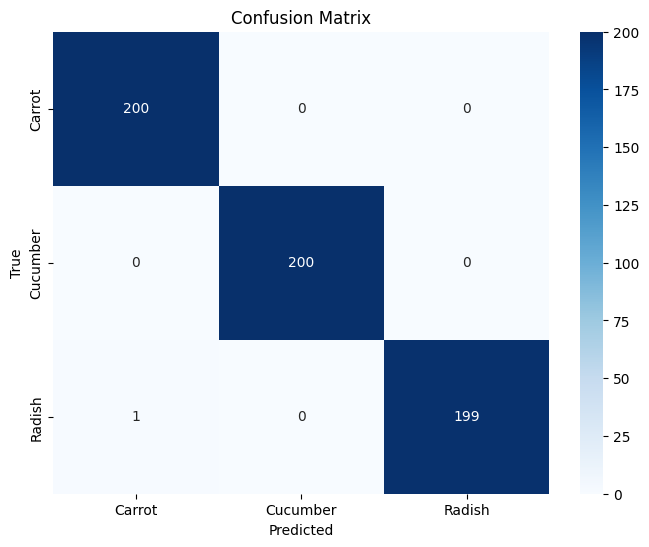

Accuracy for Carrot: 1.0000
Accuracy for Cucumber: 1.0000
Accuracy for Radish: 0.9950

Detailed Metrics per Class:
Carrot:
  Precision: 0.9950
  Recall:    1.0000
  F1-score:  0.9975

Cucumber:
  Precision: 1.0000
  Recall:    1.0000
  F1-score:  1.0000

Radish:
  Precision: 1.0000
  Recall:    0.9950
  F1-score:  0.9975



In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Загрузка лучшей модели
model.load_state_dict(torch.load("best_vgg16_cpu.pth"))
model.eval()

# Сбор предсказаний и истинных меток
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Классы из датасета
class_names = test_dataset.classes

### 1. Classification Report (Precision, Recall, F1, Accuracy)
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names, digits=4))

### 2. Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### 3. Accuracy по классам
class_acc = {}
for i, class_name in enumerate(class_names):
    correct = cm[i, i]
    total = sum(cm[i, :])
    class_acc[class_name] = correct / total
    print(f"Accuracy for {class_name}: {class_acc[class_name]:.4f}")

### 4. Дополнительные метрики
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print("\nDetailed Metrics per Class:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall:    {recall[i]:.4f}")
    print(f"  F1-score:  {f1[i]:.4f}\n")

## 2.4. Загрузите обученную модель из прошлой практической работы


In [ ]:
# Ваш код


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

Модель 1

Found 600 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Classification Report:
              precision    recall  f1-score   support

      Carrot     0.5714    0.2000    0.2963       200
    Cucumber     0.4008    1.0000    0.5722       200
      Radish     0.3871    0.0600    0.1039       200

    accuracy                         0.4200       600
   macro avg     0.4531    0.4200    0.3241       600
weighted avg     0.4531    0.4200    0.3241       600



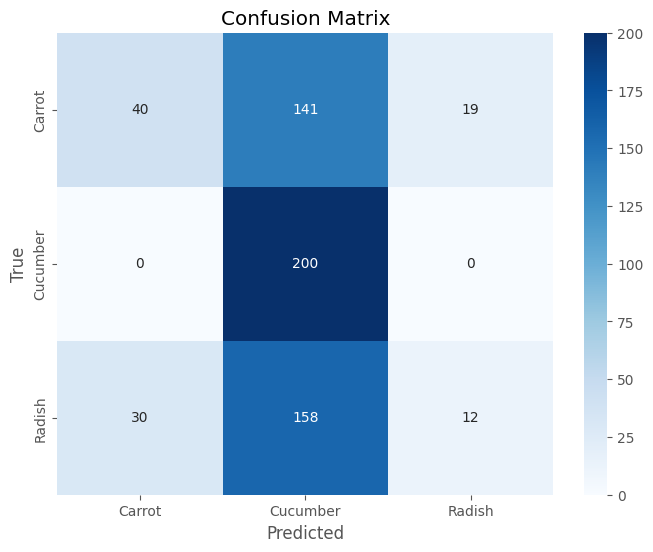


Class Accuracy:
Carrot: 0.2000
Cucumber: 1.0000
Radish: 0.0600

Detailed Metrics:
Carrot:
  Precision: 0.5714
  Recall:    0.2000
  F1-score:  0.2963
Cucumber:
  Precision: 0.4008
  Recall:    1.0000
  F1-score:  0.5722
Radish:
  Precision: 0.3871
  Recall:    0.0600
  F1-score:  0.1039


In [39]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 1. Загрузка модели и LabelBinarizer
model = load_model("model_3_1.h5")
with open("label_bin_3_1", "rb") as f:
    lb = pickle.loads(f.read())

# 2. Подготовка тестовых данных (укажите ваш путь)
test_dir = "/content/Vegetable Images/test"
img_size = (32, 32)  # Изменено: размер должен быть (32, 32)

# 3. Создание генератора тестовых данных
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,  # Используем измененный размер
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 4. Получение предсказаний
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

# Получение истинных меток
y_true = test_generator.classes

# Получение имён классов
class_names = list(lb.classes_)

# 5. Вывод метрик
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Accuracy по классам
print("\nClass Accuracy:")
for i, class_name in enumerate(class_names):
    accuracy = cm[i, i] / cm[i].sum()
    print(f"{class_name}: {accuracy:.4f}")

# Дополнительные метрики
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print("\nDetailed Metrics:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall:    {recall[i]:.4f}")
    print(f"  F1-score:  {f1[i]:.4f}")

Модель 2

Found 600 images belonging to 3 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Classification Report:
              precision    recall  f1-score   support

      Carrot     0.0000    0.0000    0.0000       200
    Cucumber     0.8684    0.9900    0.9252       200
      Radish     0.4973    0.9250    0.6469       200

    accuracy                         0.6383       600
   macro avg     0.4552    0.6383    0.5240       600
weighted avg     0.4552    0.6383    0.5240       600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


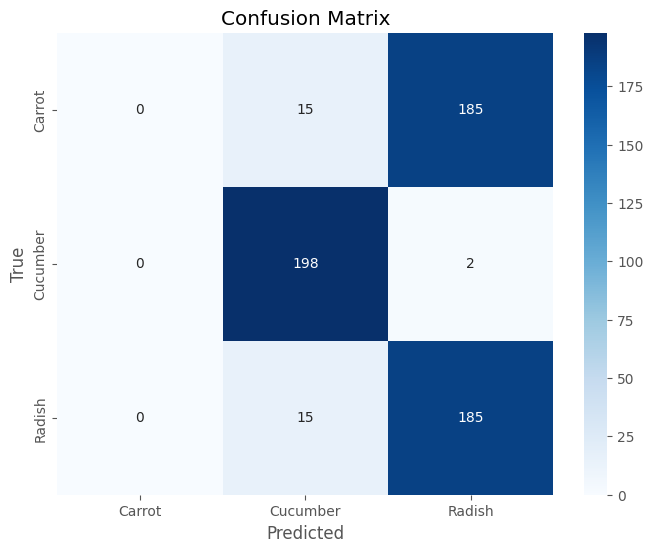


Class Accuracy:
Carrot: 0.0000
Cucumber: 0.9900
Radish: 0.9250

Detailed Metrics:
Carrot:
  Precision: nan
  Recall:    0.0000
  F1-score:  nan
Cucumber:
  Precision: 0.8684
  Recall:    0.9900
  F1-score:  0.9252
Radish:
  Precision: 0.4973
  Recall:    0.9250
  F1-score:  0.6469


<ipython-input-42-b22498989ede>:77: RuntimeWarning: invalid value encountered in divide
  precision = TP / (TP + FP)


In [42]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 1. Загрузка модели и LabelBinarizer
model = load_model("model_2.h5")
with open("label_bin_2", "rb") as f:
    lb = pickle.loads(f.read())

# 2. Подготовка тестовых данных
test_dir = "/content/Vegetable Images/test"
img_size = (32, 32)  # Размер должен соответствовать обучению

# 3. Создание генератора с правильным препроцессингом
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 4. Функция для преобразования изображений в плоский вектор
def flatten_images(generator):
    images, labels = [], []
    for i in range(len(generator)):
        x, y = generator[i]
        images.append(x.reshape(x.shape[0], -1))  # Преобразуем (batch, 32, 32, 3) в (batch, 3072)
        labels.append(y)
    return np.vstack(images), np.vstack(labels)

# Получаем данные в правильном формате
X_test, y_test = flatten_images(test_generator)
y_true = np.argmax(y_test, axis=1)

# 5. Получение предсказаний
preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)

# Получение имён классов
class_names = list(lb.classes_)

# 6. Вывод метрик
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Accuracy по классам
print("\nClass Accuracy:")
for i, class_name in enumerate(class_names):
    accuracy = cm[i, i] / cm[i].sum()
    print(f"{class_name}: {accuracy:.4f}")

# Дополнительные метрики
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print("\nDetailed Metrics:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall:    {recall[i]:.4f}")
    print(f"  F1-score:  {f1[i]:.4f}")

**Результат:**


*   Модели из второго задания и свёрточной сети точно распознают только морковь
*   Модель на очнове архитектуры VGGNet распознаtn все образцы


# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [ ]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

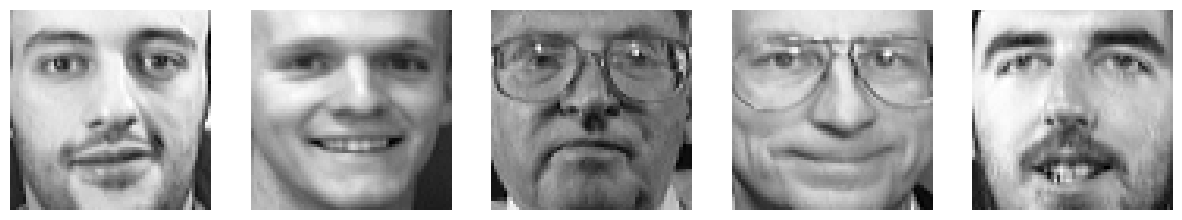

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

#trainY = to_categorical(trainY, 3)
#testY = to_categorical(testY, 3)

#X_train = np.expand_dims(X_train, axis=-1)
#X_test = np.expand_dims(X_test, axis=-1)

X_train.shape
X_test.shape

(80, 32, 64)

Вот один пример обучающей пары.

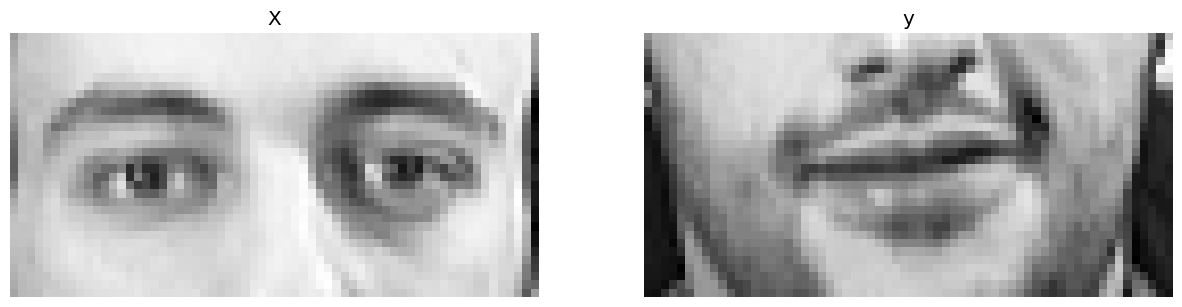

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
# model = Sequential([
#     Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 64, 1)),
#     #MaxPooling2D((2, 2), strides=2),
#     Conv2D(64, (3,3), padding='same', activation='relu'),
#     MaxPooling2D((2, 2), strides=2),
#     Conv2D(128, (5,5), padding='same', activation='relu'),
#     MaxPooling2D((3, 3), strides=2),
#     Flatten(),
#     Dense(4096,  activation='relu'),
#     Dense(2048,  activation='sigmoid'),
# ])

# model.summary()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    # Первый блок свертки
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 64, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),

    # Второй блок свертки
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),

    # Третий блок свертки
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),

    # Выпрямление и полносвязные слои
    Flatten(),
    Dense(1024, activation='relu'),  # Уменьшаем размер полносвязного слоя
    Dropout(0.5),                    # Регуляризация
    Dense(2048, activation='linear') # Линейная активация для регрессии
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 32, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 32, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 16, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 16, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 8, 16, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 8, 16, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 8, 16, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 4, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2048)                │       2,099,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,388,096 (24.37 MB)

 Trainable params: 6,387,648 (24.37 MB)

 Non-trainable params: 448 (1.75 KB)

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
from tensorflow.keras.optimizers import Adam

# Параметры + компиляция
EPOCHS = 100

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',  # Mean Squared Error
              metrics=['mae'])  # Mean Absolute Error

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Коллбэки
early_stopping = EarlyStopping(
    monitor='val_loss',  # Мониторинг валидационных потерь
    patience=10,         # Количество эпох без улучшений
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    filepath="best_model_3_3.h5",
    monitor='val_loss',  # Сохранение модели с минимальными потерями
    save_best_only=True,
    verbose=1
)

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
# Обучение модели
H = model.fit(
    X_train, y_train_n,
    validation_data=(X_test, y_test_n),
    epochs=EPOCHS,
    batch_size=32,  # Уменьшите размер батча, если возникают проблемы с памятью
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - loss: 0.4487 - mae: 0.5114
Epoch 1: val_loss improved from inf to 0.19012, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 396ms/step - loss: 0.4303 - mae: 0.4990 - val_loss: 0.1901 - val_mae: 0.4043
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - loss: 0.0507 - mae: 0.1800
Epoch 2: val_loss improved from 0.19012 to 0.11547, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 520ms/step - loss: 0.0501 - mae: 0.1789 - val_loss: 0.1155 - val_mae: 0.3000
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 0.0295 - mae: 0.1366
Epoch 3: val_loss improved from 0.11547 to 0.09027, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - loss: 0.0294 - mae: 0.1364 - val_loss: 0.0903 - val_mae: 0.2587
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 0.0256 - mae: 0.1273
Epoch 4: val_loss improved from 0.09027 to 0.08281, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - loss: 0.0256 - mae: 0.1272 - val_loss: 0.0828 - val_mae: 0.2462
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.0253 - mae: 0.1269
Epoch 5: val_loss improved from 0.08281 to 0.07282, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - loss: 0.0252 - mae: 0.1266 - val_loss: 0.0728 - val_mae: 0.2285
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 0.0228 - mae: 0.1199
Epoch 6: val_loss improved from 0.07282 to 0.06061, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 316ms/step - loss: 0.0227 - mae: 0.1198 - val_loss: 0.0606 - val_mae: 0.2044
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 0.0202 - mae: 0.1125
Epoch 7: val_loss improved from 0.06061 to 0.05620, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - loss: 0.0202 - mae: 0.1125 - val_loss: 0.0562 - val_mae: 0.1963
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 0.0190 - mae: 0.1085
Epoch 8: val_loss improved from 0.05620 to 0.05330, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - loss: 0.0190 - mae: 0.1084 - val_loss: 0.0533 - val_mae: 0.1909
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 0.0176 - mae: 0.1037
Epoch 9: val_loss improved from 0.05330 to 0.05085, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - loss: 0.0176 - mae: 0.1037 - val_loss: 0.0508 - val_mae: 0.1860
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - loss: 0.0181 - mae: 0.1053
Epoch 10: val_loss improved from 0.05085 to 0.04731, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - loss: 0.0181 - mae: 0.1052 - val_loss: 0.0473 - val_mae: 0.1787
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 0.0170 - mae: 0.1018
Epoch 11: val_loss did not improve from 0.04731
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - loss: 0.0170 - mae: 0.1018 - val_loss: 0.0485 - val_mae: 0.1816
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 0.0158 - mae: 0.0977
Epoch 12: val_loss did not improve from 0.04731
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 294ms/step - loss: 0.0158 - mae: 0.0977 - val_loss: 0.0485 - val_mae: 0.1819
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 0.0157 - mae: 0.0978
Epoch 13: val_loss improved from 0.04731 to 0.04418, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 363ms/step - loss: 0.0156 - mae: 0.0977 - val_loss: 0.0442 - val_mae: 0.1725
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 0.0149 - mae: 0.0952
Epoch 14: val_loss improved from 0.04418 to 0.04300, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - loss: 0.0149 - mae: 0.0953 - val_loss: 0.0430 - val_mae: 0.1699
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 0.0150 - mae: 0.0952
Epoch 15: val_loss improved from 0.04300 to 0.04167, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - loss: 0.0150 - mae: 0.0951 - val_loss: 0.0417 - val_mae: 0.1672
Epoch 16/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - loss: 0.0146 - mae: 0.0940
Epoch 16: val_loss did not improve from 0.04167
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 392ms/step - loss: 0.0146 - mae: 0.0940 - val_loss: 0.0444 - val_mae: 0.1735
Epoch 17/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 0.0143 - mae: 0.0930
Epoch 17: val_loss did not improve from 0.04167
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - loss: 0.0143 - mae: 0.0931 - val_loss: 0.0438 - val_mae: 0.1723
Epoch 18/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 0.0140 - mae: 0.0922
Epoch 18: val_loss improved from 0.04167 to 0.04161, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 312ms/step - loss: 0.0141 - mae: 0.0923 - val_loss: 0.0416 - val_mae: 0.1675
Epoch 19/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 0.0132 - mae: 0.0895
Epoch 19: val_loss improved from 0.04161 to 0.03886, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 363ms/step - loss: 0.0132 - mae: 0.0895 - val_loss: 0.0389 - val_mae: 0.1611
Epoch 20/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 0.0139 - mae: 0.0918
Epoch 20: val_loss did not improve from 0.03886
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - loss: 0.0139 - mae: 0.0917 - val_loss: 0.0411 - val_mae: 0.1666
Epoch 21/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 0.0131 - mae: 0.0891
Epoch 21: val_loss did not improve from 0.03886
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - loss: 0.0131 - mae: 0.0892 - val_loss: 0.0415 - val_mae: 0.1674
Epoch 22/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 0.0127 - mae: 0.0877
Epoch 22: val_loss improved from 0.03886 to 0.03750, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 399ms/step - loss: 0.0128 - mae: 0.0879 - val_loss: 0.0375 - val_mae: 0.1582
Epoch 23/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - loss: 0.0128 - mae: 0.0883
Epoch 23: val_loss improved from 0.03750 to 0.03634, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - loss: 0.0128 - mae: 0.0882 - val_loss: 0.0363 - val_mae: 0.1555
Epoch 24/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 0.0125 - mae: 0.0870
Epoch 24: val_loss did not improve from 0.03634
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - loss: 0.0125 - mae: 0.0870 - val_loss: 0.0370 - val_mae: 0.1570
Epoch 25/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - loss: 0.0121 - mae: 0.0857
Epoch 25: val_loss did not improve from 0.03634
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 407ms/step - loss: 0.0121 - mae: 0.0858 - val_loss: 0.0371 - val_mae: 0.1573
Epoch 26/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 0.0127 - mae: 0.0881
Epoch 26: val_loss improved from 0.03634 to 0.03542, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - loss: 0.0127 - mae: 0.0881 - val_loss: 0.0354 - val_mae: 0.1536
Epoch 27/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 0.0128 - mae: 0.0884
Epoch 27: val_loss improved from 0.03542 to 0.03206, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - loss: 0.0127 - mae: 0.0884 - val_loss: 0.0321 - val_mae: 0.1456
Epoch 28/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 0.0124 - mae: 0.0866
Epoch 28: val_loss did not improve from 0.03206
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - loss: 0.0124 - mae: 0.0867 - val_loss: 0.0328 - val_mae: 0.1472
Epoch 29/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 0.0114 - mae: 0.0833
Epoch 29: val_loss improved from 0.03206 to 0.03076, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - loss: 0.0114 - mae: 0.0834 - val_loss: 0.0308 - val_mae: 0.1421
Epoch 30/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - loss: 0.0121 - mae: 0.0858
Epoch 30: val_loss did not improve from 0.03076
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 279ms/step - loss: 0.0121 - mae: 0.0859 - val_loss: 0.0326 - val_mae: 0.1469
Epoch 31/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 0.0124 - mae: 0.0874
Epoch 31: val_loss did not improve from 0.03076
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - loss: 0.0124 - mae: 0.0871 - val_loss: 0.0317 - val_mae: 0.1446
Epoch 32/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 0.0129 - mae: 0.0901
Epoch 32: val_loss did not improve from 0.03076
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - loss: 0.0129 - mae: 0.0900 - val_loss: 0.0354 - val_mae: 0.1536
Epoch 33/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 0.0133 - mae: 0.0911
Epoch 33: val_loss improved from 0.03076 to 0.03071, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 312ms/step - loss: 0.0133 - mae: 0.0908 - val_loss: 0.0307 - val_mae: 0.1427
Epoch 34/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 0.0119 - mae: 0.0856
Epoch 34: val_loss improved from 0.03071 to 0.02982, saving model to best_model_3_3.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 298ms/step - loss: 0.0119 - mae: 0.0856 - val_loss: 0.0298 - val_mae: 0.1401
Epoch 35/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 0.0117 - mae: 0.0843
Epoch 35: val_loss did not improve from 0.02982
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - loss: 0.0117 - mae: 0.0843 - val_loss: 0.0384 - val_mae: 0.1611
Epoch 36/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 0.0111 - mae: 0.0824
Epoch 36: val_loss did not improve from 0.02982
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 336ms/step - loss: 0.0111 - mae: 0.0824 - val_loss: 0.0714 - val_mae: 0.2301
Epoch 37/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 0.0111 - mae: 0.0823
Epoch 37: val_loss did not improve from 0.02982
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - loss: 0.0111 - mae: 0.0822 - val_loss: 0.0552 - val_mae: 0.1982
Epoch 38/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 0.0104 - mae: 0.0790
Epoch 38: val_loss did not improve from 0.02982
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - loss:

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - loss: 0.0102 - mae: 0.0786 - val_loss: 0.0285 - val_mae: 0.1364
Epoch 42/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 0.0107 - mae: 0.0807
Epoch 42: val_loss did not improve from 0.02846
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - loss: 0.0107 - mae: 0.0807 - val_loss: 0.0756 - val_mae: 0.2379
Epoch 43/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - loss: 0.0100 - mae: 0.0782
Epoch 43: val_loss did not improve from 0.02846
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 400ms/step - loss: 0.0100 - mae: 0.0782 - val_loss: 0.1024 - val_mae: 0.2859
Epoch 44/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 0.0101 - mae: 0.0779
Epoch 44: val_loss did not improve from 0.02846
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - loss: 0.0101 - mae: 0.0779 - val_loss: 0.1193 - val_mae: 0.3134
Epoch 45/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 0.0098 - mae: 0.0766
Epoch 45: val_loss did not improve from 0.02846
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - loss:

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Загрузка модели с явным указанием функции потерь
model = load_model("best_model_3_3.h5", custom_objects={'mse': MeanSquaredError()})

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
preds = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [ ]:
preds.shape

(80, 2048)

## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
#print(classification_report(y_test_n.argmax(axis=1),
#	preds.argmax(axis=1), target_names='face'))

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

0.13639436662197113

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
pred_test = preds.reshape((preds.shape[0], 32, 64))
pred_test.shape

(80, 32, 64)

Отрисуйте все предсказания.

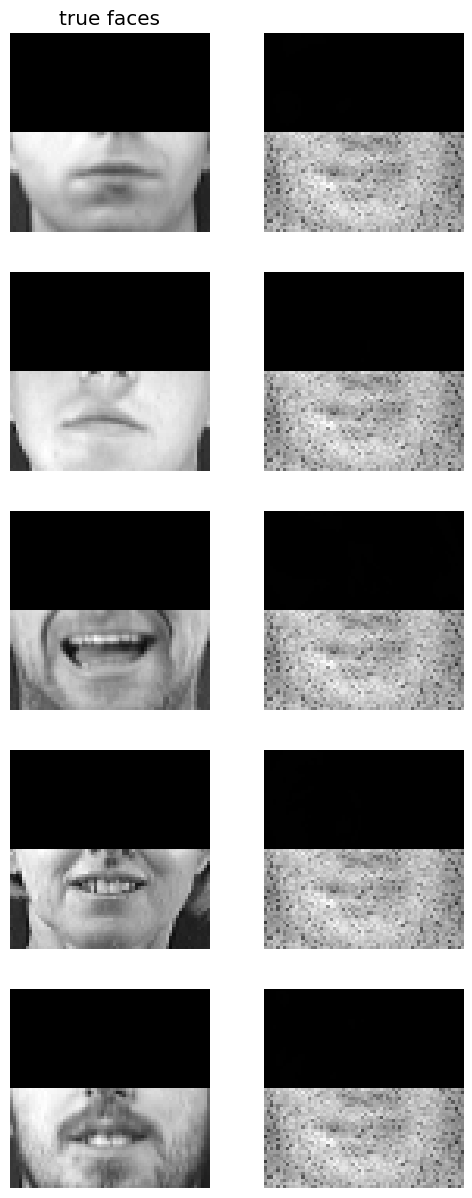

In [ ]:
# Пример кода:

n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )